In [22]:
"""
Time Series Decomposition Example
---------------------------------
This script generates synthetic temperature data (trend + seasonality + noise),
then decomposes it using statsmodels.seasonal_decompose, and visualizes the results.

Requirements:
- pandas
- numpy
- matplotlib
- statsmodels
"""

'\nTime Series Decomposition Example\n---------------------------------\nThis script generates synthetic temperature data (trend + seasonality + noise),\nthen decomposes it using statsmodels.seasonal_decompose, and visualizes the results.\n\nRequirements:\n- pandas\n- numpy\n- matplotlib\n- statsmodels\n'

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
# reproducibility
np.random.seed(42)

In [25]:
# -----------------------------
# Generate synthetic time series
# -----------------------------
dates = pd.date_range(start="2025-01-01", periods=180, freq="D")
trend = np.linspace(5, 30, 180)
seasonality = 5 * np.sin(np.linspace(0, 12*np.pi, 180))
noise = np.random.normal(0, 2, 180)
temperature = trend + seasonality + noise

df = pd.DataFrame({"Date": dates, "Temperature": temperature})
df.set_index("Date", inplace=True)

In [26]:
# -----------------------------
# Decompose time series
# -----------------------------
result = seasonal_decompose(df["Temperature"], model="additive", period=30)

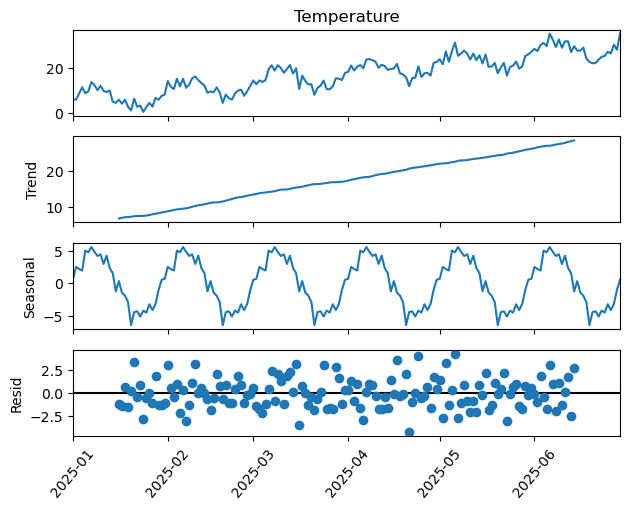

In [28]:
# -----------------------------
# Plot decomposition
# -----------------------------
result.plot()
plt.xticks(rotation=50)
plt.show()

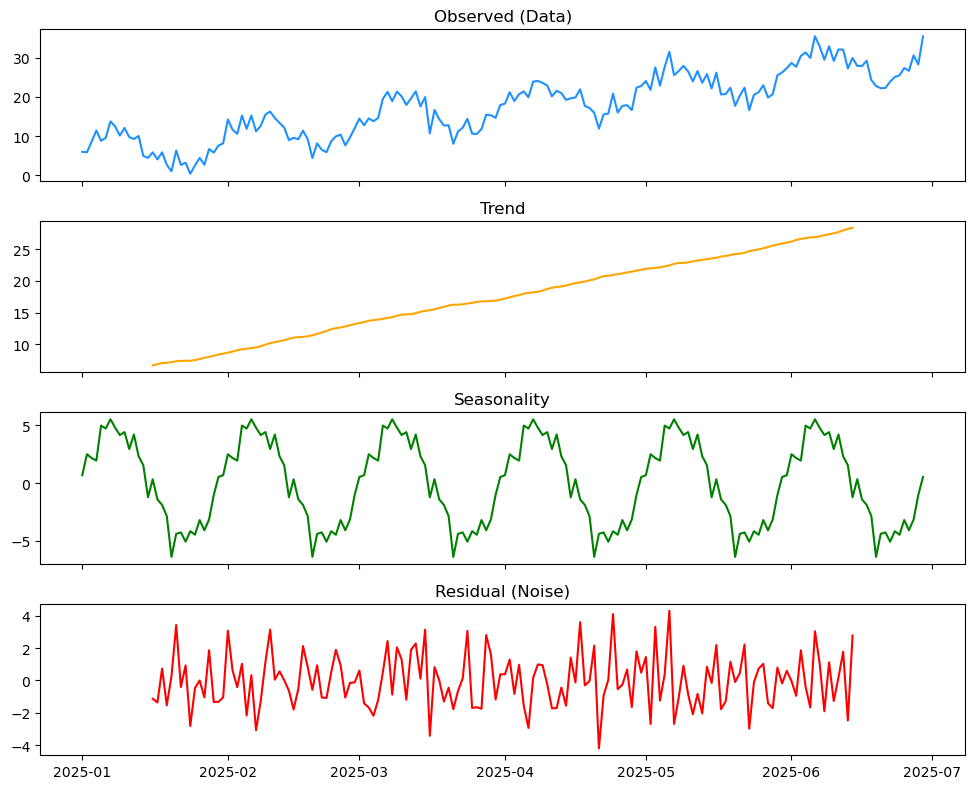

In [30]:
# -----------------------------
# Plot decomposition
# -----------------------------
fig, axes = plt.subplots(4, 1, figsize = (10, 8), sharex=True)

axes[0].plot(df.index, result.observed, color="dodgerblue")
axes[0].set_title("Observed (Data)")

axes[1].plot(df.index, result.trend, color="orange")
axes[1].set_title("Trend")

axes[2].plot(df.index, result.seasonal, color="green")
axes[2].set_title("Seasonality")

axes[3].plot(df.index, result.resid, color="red")
axes[3].set_title("Residual (Noise)")

plt.tight_layout()
plt.show()